In [1]:
path = "../data/"
csvfile = "Species_Settlement_Experiments_Results_Fig2.csv"

#import pandas
import pandas as pd
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline
df = pd.read_csv(path+csvfile)
print(df)
df.head()
df.info()

           Date Abbreviation                    Species  #_coverslip  #_crawl  \
0    16/03/2021          nbc               Control_slip            3        0   
1    16/03/2021          nbc               Control_slip            2        0   
2    16/03/2021          nbc               Control_slip            0        2   
3    16/03/2021       Ach.sp              Achnanthes_sp            6        5   
4    16/03/2021       Ach.sp              Achnanthes_sp            8        1   
..          ...          ...                        ...          ...      ...   
751  10/05/2022        F.vir  Fragilariformia_virescens            5        3   
752  10/05/2022        F.vir  Fragilariformia_virescens           11        3   
753  10/05/2022        T.sue        Tetraselmis_suecica            5        5   
754  10/05/2022        T.sue        Tetraselmis_suecica            4        6   
755  10/05/2022        T.sue        Tetraselmis_suecica            1        6   

     #_swim  #_dead  diatom

In [2]:
# Create an additional column '%_settlement_total' after converting the existing '%_coverslip' column into a percentage of total larvae (assumed 30 larvae/sample).
#also same for 48h, and % alive as well.  
# create a new column
df['%_settlement_total'] = df['#_coverslip'] / 30 * 100
df['%_settlement_alive'] = (df['#_coverslip'] / (30 - df['#_dead'])) * 100
  
# Print the DataFrame after 
# addition of new column
print(df)
df.head()
df.info()


           Date Abbreviation                    Species  #_coverslip  #_crawl  \
0    16/03/2021          nbc               Control_slip            3        0   
1    16/03/2021          nbc               Control_slip            2        0   
2    16/03/2021          nbc               Control_slip            0        2   
3    16/03/2021       Ach.sp              Achnanthes_sp            6        5   
4    16/03/2021       Ach.sp              Achnanthes_sp            8        1   
..          ...          ...                        ...          ...      ...   
751  10/05/2022        F.vir  Fragilariformia_virescens            5        3   
752  10/05/2022        F.vir  Fragilariformia_virescens           11        3   
753  10/05/2022        T.sue        Tetraselmis_suecica            5        5   
754  10/05/2022        T.sue        Tetraselmis_suecica            4        6   
755  10/05/2022        T.sue        Tetraselmis_suecica            1        6   

     #_swim  #_dead  diatom

In [3]:
#make a subset of df where time=24 h after induction
subset24 = df.loc[df["Time after induction (h)"]==24]

#make a subset of df where time=48 h after induction
subset48 = df.loc[df["Time after induction (h)"]==48]

In [4]:
#Run a Shapiro-Wilks test on data to check distribution
#import libraries needed
import numpy as np
from scipy.stats import shapiro
from numpy.random import random

#Conduct the Shapiro-Wilk Test
shapiroresult24 = shapiro(subset24["%_settlement_alive"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution.

#Conduct the Shapiro-Wilk Test
shapiroresult48 = shapiro(subset48["%_settlement_alive"])

print(shapiroresult24)
print(shapiroresult48)

ShapiroResult(statistic=0.8978221416473389, pvalue=3.124069691227147e-15)
ShapiroResult(statistic=0.948483407497406, pvalue=3.3368149909840383e-10)


In [5]:
#We want to know if each species of microlgae used causes significantly more settlement than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05, at 24 and 48h.

from scipy import stats

#test subsetting the data correctly for 24h control and other treatments
print(df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Species'] == "Control_slip")])
print(np.unique(df['Species']))

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_values= {}
ctrl_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Species'] == "Control_slip")]
for treatment in np.unique(df['Species']):
    test_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Species'] == treatment)]
    print(treatment)
    res = stats.mannwhitneyu(ctrl_data, test_data)
    print(res)
    p_values[treatment] = res[1]

#make a dictionary called 'p-values48' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_values48= {}
ctrl_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Species'] == "Control_slip")]
for treatment in np.unique(df['Species']):
    test_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Species'] == treatment)]
    print(treatment)
    res48 = stats.mannwhitneyu(ctrl_data48, test_data48)
    print(res48)
    p_values48[treatment] = res48[1]
    
#combine the two dictionaries for 24 and 48h into one dictionary
def mergeDictionary(p_values, p_values48):
   dict_both = {**p_values, **p_values48}
   for key, value in dict_both.items():
       if key in p_values and key in p_values48:
               dict_both[key] = [value , p_values[key]]
   return dict_both

dict_both = mergeDictionary(p_values, p_values48)
print(dict_both)

#make a dataframe from this dictionary
MW_results = pd.DataFrame.from_dict(dict_both, orient='index',
                       columns=['24h p-value', '48h p-value'])
MW_results_sorted = MW_results.sort_values(by='48h p-value', ascending=False)
MWresults_html = MW_results_sorted.style.set_caption('Table S1. Mann-Whitney U rank test p-values for different cues vs negative control')

#Save to file
MW_results_sorted.to_csv("../output/SuppTable_for_fig2a.csv")
MWresults_html.to_html("../output/SuppTable_for_fig2a.html")


0      10.344828
1       7.407407
2       0.000000
51     11.111111
52      3.448276
53     13.333333
102     0.000000
103    10.000000
104    10.714286
153     3.448276
154     3.333333
155     6.666667
204     0.000000
205     3.333333
206     3.448276
255     6.666667
256     3.333333
257     3.333333
Name: %_settlement_alive, dtype: float64
['Achnanthes_brevipes' 'Achnanthes_sp' 'Achnanthes_yaquinensis_0020'
 'Achnanthes_yaquinensis_0053' 'Amphora_coffeaeformis' 'Amphora_sp'
 'Amphora_sp_RCC7063' 'Asterionellopsis_cf_glacialis' 'Bacteriastrum_sp'
 'Chaetoceros_cf_lauderi' 'Chaetoceros_convolutus'
 'Chaetoceros_pseudocurvisetus' 'Chrysotila_lamellosa'
 'Conticribra_weisflogii' 'Control_slip' 'Coscinodiscus_sp'
 'Cyclotella_sp' 'Cylindrotheca_closterium' 'Diploneis_sp'
 'Entomoneis_alata' 'Fragilaria_striatula' 'Fragilariformia_virescens'
 'Fragilariopsis_sp' 'Gomphonema_sp' 'Grammatophora_marina'
 'Helicotheca_sp' 'Hyalosira_sp' 'Melosira_nummuloides'
 'Navicula_phyllepta' 'Navicula

In [6]:
#The Bonferroni correction counteracts the family-wise error rate problem by adjusting the alpha value based on the number of tests. To find your adjusted significance level, divide the significance level (α) for a single test by the number of tests (n)
#Here, we adjust the p-value as 0.05/40=0.00125

In [7]:
#From the 24h dataset, use both the Mann-Whitney U rank test, and the median
#% settlement to generate an order of species ("Abbreviation") for the
#subsequent graphs that will be made for Figure 2.
#This will also allow us to generate a conditional colour palette for graphs, based on p-values
#of the Mann-Whitney U-rank test.

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_values24_abb= {}
ctrl_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data = df["%_settlement_alive"][(df['Time after induction (h)']==24) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res = stats.mannwhitneyu(ctrl_data, test_data)
    print(res)
#Make sure the p-values are considered only up to 6 decimal places, so that p-values + median will make the
#correct ordering
    p_values24_abb[treatment] = round(res[1], 6)

print(p_values24_abb.keys())

#make a dataframe from this dictionary
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_vals = df[df["Time after induction (h)"] == 24].groupby("Abbreviation")["%_settlement_alive"].median()
#make a dataframe with 'Abbreviation', '24h p-value', 'Median' from % settlement alive at 24h data
dftest = pd.DataFrame(list(zip(p_values24_abb.keys(), p_values24_abb.values(), median_vals)),
                      columns =['Abbreviation', '24h p-value', 'Median'])
print(dftest)


#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette = []
for value in dftest['24h p-value']:
    if value < 0.00125:
        custom_palette.append('steelblue')
    elif (value > 0.00125) and (value < 0.05):
        custom_palette.append('lightblue')
    else:
        custom_palette.append('whitesmoke')
print(custom_palette)
print(dftest['Abbreviation'])

dictionary = dict(zip(dftest["Abbreviation"], custom_palette))
print(dictionary)

A.bre
MannwhitneyuResult(statistic=0.0, pvalue=3.2698740716793495e-05)
A.cof
MannwhitneyuResult(statistic=46.0, pvalue=0.07437175345733037)
A.gla
MannwhitneyuResult(statistic=83.5, pvalue=0.9171805707034462)
A.yaq1
MannwhitneyuResult(statistic=38.0, pvalue=0.02801631128578682)
A.yaq2
MannwhitneyuResult(statistic=47.0, pvalue=0.08297653679372147)
Ach.sp
MannwhitneyuResult(statistic=0.0, pvalue=3.2881593416653855e-05)
Amp.sp
MannwhitneyuResult(statistic=33.5, pvalue=0.015127464597602782)
Amp.sp2
MannwhitneyuResult(statistic=59.5, pvalue=0.276465754464271)
Bac.sp
MannwhitneyuResult(statistic=37.5, pvalue=0.026360977217015257)
C.clo
MannwhitneyuResult(statistic=28.0, pvalue=0.006706275607805576)
C.con
MannwhitneyuResult(statistic=114.5, pvalue=0.08350955835553368)
C.lam
MannwhitneyuResult(statistic=16.5, pvalue=0.000951672086029404)
C.lau
MannwhitneyuResult(statistic=43.5, pvalue=0.055555708095758695)
C.pse
MannwhitneyuResult(statistic=38.0, pvalue=0.027871299073100163)
C.wei
MannwhitneyuR

In [8]:
#From the 48h dataset, we will generate a conditional colour palette for graphs, based on p-values
#of the Mann-Whitney U-rank test.

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_values48_abb= {}
ctrl_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == "nbc")]
for treatment in np.unique(df['Abbreviation']):
    test_data48 = df["%_settlement_alive"][(df['Time after induction (h)']==48) & (df['Abbreviation'] == treatment)]
    print(treatment)
    res48 = stats.mannwhitneyu(ctrl_data48, test_data48)
    print(res48)
#Make sure the p-values are considered only up to 6 decimal places, so that p-values + median will make the
#correct ordering
    p_values48_abb[treatment] = round(res48[1], 6)

print(p_values48_abb.keys())

#make a dataframe from this dictionary
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_vals48 = df[df["Time after induction (h)"] == 48].groupby("Abbreviation")["%_settlement_alive"].median()
#make a dataframe with 'Abbreviation', '48h p-value', 'Median' from % settlement alive at 48h data
dftest48 = pd.DataFrame(list(zip(p_values48_abb.keys(), p_values48_abb.values(), median_vals48)),
                      columns =['Abbreviation', '48h p-value', 'Median'])
print(dftest48)


#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette48 = []
for value in dftest48['48h p-value']:
    if value < 0.00125:
        custom_palette48.append('steelblue')
    elif (value > 0.00125) and (value < 0.05):
        custom_palette48.append('lightblue')
    else:
        custom_palette48.append('whitesmoke')
print(custom_palette48)
print(dftest48['Abbreviation'])

dictionary48 = dict(zip(dftest48["Abbreviation"], custom_palette48))
print(dictionary48)

A.bre
MannwhitneyuResult(statistic=0.0, pvalue=3.42787007037498e-05)
A.cof
MannwhitneyuResult(statistic=15.5, pvalue=0.0008189624898795417)
A.gla
MannwhitneyuResult(statistic=46.0, pvalue=0.07566908821201279)
A.yaq1
MannwhitneyuResult(statistic=44.0, pvalue=0.06015526400906435)
A.yaq2
MannwhitneyuResult(statistic=69.5, pvalue=0.5708378192067158)
Ach.sp
MannwhitneyuResult(statistic=0.0, pvalue=3.42787007037498e-05)
Amp.sp
MannwhitneyuResult(statistic=25.0, pvalue=0.004273564702037611)
Amp.sp2
MannwhitneyuResult(statistic=10.0, pvalue=0.0002834113236492016)
Bac.sp
MannwhitneyuResult(statistic=10.5, pvalue=0.00031436920002984284)
C.clo
MannwhitneyuResult(statistic=20.5, pvalue=0.0019994441605912933)
C.con
MannwhitneyuResult(statistic=63.0, pvalue=0.36711311197324925)
C.lam
MannwhitneyuResult(statistic=14.5, pvalue=0.0006806246476476784)
C.lau
MannwhitneyuResult(statistic=80.0, pvalue=0.9794515056257862)
C.pse
MannwhitneyuResult(statistic=13.0, pvalue=0.0005128625771344613)
C.wei
Mannwhitn

In [9]:
#Now we will also import the Growth at 11days data for the 40 different microalgae species.
#So that we can plot it as a graph underneath the settlement graph
df2 = pd.read_csv(../data/Species_Settlement_growth_11days_Fig2.csv")
print(df2)
df2.head()
df2.info()

            Date              Species  Length (micron)  No. segments  \
0     16/03/2021         Control_slip          338.727             3   
1     16/03/2021         Control_slip          355.277             3   
2     16/03/2021         Control_slip          358.060             3   
3     16/03/2021         Control_slip          354.285             3   
4     16/03/2021         Control_slip          368.131             3   
...          ...                  ...              ...           ...   
2316  10/05/2022  Tetraselmis_suecica          280.947             3   
2317  10/05/2022  Tetraselmis_suecica          321.263             3   
2318  10/05/2022  Tetraselmis_suecica          342.531             3   
2319  10/05/2022  Tetraselmis_suecica          347.583             3   
2320  10/05/2022  Tetraselmis_suecica          380.197             3   

     Abbreviation  
0             nbc  
1             nbc  
2             nbc  
3             nbc  
4             nbc  
...           .

In [10]:
#Conduct the Shapiro-Wilk Test to check if size data is normally distributed
shapiro(df2["Length (micron)"])
#The test rejects the hypothesis of normality when the p-value is less than or equal to 0.05. We can state with 95% confidence that the data does NOT fit the normal distribution. 

ShapiroResult(statistic=0.9095057845115662, pvalue=4.2868766558661473e-35)

In [11]:
#We want to know if each species of microlgae used causes significantly more settlement than control, after 24 and 48h.
#We will do Mann-Whitney U rank test on each treatment vs control to check for p-value <0.05.


#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 24h
p_valuesgrowth= {}
ctrl_data = df2["Length (micron)"][(df2['Abbreviation']=="nbc")]

for treatment in np.unique(df2["Abbreviation"]):
    test_data = df2["Length (micron)"][(df2["Abbreviation"]==treatment)]
    print(treatment)
    res = stats.mannwhitneyu(ctrl_data, test_data)
    print(res)
    p_valuesgrowth[treatment] = res[1]

#make a dataframe from this dictionary
growth_results = pd.DataFrame.from_dict(p_valuesgrowth, orient='index',
                       columns=['Growth 11days p-value'])
growth_results_sorted = growth_results.sort_values(by='Growth 11days p-value', ascending=False)
growth_results_html = growth_results_sorted.style.set_caption('Table S4. Mann-Whitney U rank test p-values for size at 11 days in response to different cues vs negative control')
growth_results_sorted.style
print(growth_results_sorted)

#Save to file
growth_results_sorted.to_csv("../output/SuppTable_for_fig2C.csv")
growth_results_html.to_html("../output/SuppTable_for_fig2C.html")

#The Bonferroni correction counteracts the family-wise error rate problem by adjusting the alpha value based on the number of tests. To find your adjusted significance level, divide the significance level (α) for a single test by the number of tests (n)
#Here, we adjust the p-value as 0.05/40=0.00125

A.bre
MannwhitneyuResult(statistic=0.0, pvalue=3.9931673242443485e-28)
A.cof
MannwhitneyuResult(statistic=301.0, pvalue=1.322630252166967e-24)
A.gla
MannwhitneyuResult(statistic=2318.0, pvalue=2.3657258288879864e-07)
A.yaq1
MannwhitneyuResult(statistic=1896.0, pvalue=4.693153688246523e-10)
A.yaq2
MannwhitneyuResult(statistic=862.0, pvalue=1.0584300364329062e-18)
Ach.sp
MannwhitneyuResult(statistic=212.0, pvalue=1.277275254025687e-25)
Amp.sp
MannwhitneyuResult(statistic=638.0, pvalue=5.890129332633429e-21)
Amp.sp2
MannwhitneyuResult(statistic=0.0, pvalue=3.992877526475187e-28)
Bac.sp
MannwhitneyuResult(statistic=1177.0, pvalue=9.223320196821318e-16)
C.clo
MannwhitneyuResult(statistic=2633.0, pvalue=1.2085690823218709e-05)
C.con
MannwhitneyuResult(statistic=2093.5, pvalue=9.897600027695705e-09)
C.lam
MannwhitneyuResult(statistic=1775.5, pvalue=6.489724693295555e-11)
C.lau
MannwhitneyuResult(statistic=3447.0, pvalue=0.01983543630031657)
C.pse
MannwhitneyuResult(statistic=2041.0, pvalue=4.

In [12]:
#From the growth dataset, we will generate a conditional colour palette for graphs, based on p-values
#of the Mann-Whitney U-rank test.

#make a dictionary called 'p-values' and output into it the results of a Mann-Whitney U test on each treatment vs control, 48h
p_valuesgrowth_abb= {}
ctrl_data_g = df2["Length (micron)"][(df2['Abbreviation'] == "nbc")]
for treatment in np.unique(df2['Abbreviation']):
    test_data_g = df2["Length (micron)"][(df2['Abbreviation'] == treatment)]
    print(treatment)
    resgrowth = stats.mannwhitneyu(ctrl_data_g, test_data_g)
    print(resgrowth)
#Make sure the p-values are considered only up to 6 decimal places, so that p-values + median will make the
#correct ordering
    p_valuesgrowth_abb[treatment] = round(resgrowth[1], 6)

print(p_valuesgrowth_abb.keys())

#make a dataframe from this dictionary
#make a dataframe with median values for each 'Abbreviation' group (ie each species median % settlement)
median_valsgrowth = df2.groupby("Abbreviation")["Length (micron)"].median()
#make a dataframe with 'Abbreviation', 'growth p-value', 'Median' from length at 11d data
dftestgrowth = pd.DataFrame(list(zip(p_valuesgrowth_abb.keys(), p_valuesgrowth_abb.values(), median_valsgrowth)),
                      columns =['Abbreviation', 'Length p-value', 'Median'])
print(dftestgrowth)

#generate a colour palette to colour graphs depending on p-value of Mann Whitney U test at 24h % settlement             
custom_palette_growth = []
for value in dftestgrowth['Length p-value']:
    if value < 0.00125:
        custom_palette_growth.append('steelblue')
    elif (value > 0.00125) and (value < 0.05):
        custom_palette_growth.append('lightblue')
    else:
        custom_palette_growth.append('whitesmoke')
print(custom_palette_growth)
print(dftestgrowth['Abbreviation'])

dictionary_growth = dict(zip(dftestgrowth["Abbreviation"], custom_palette_growth))
print(dictionary_growth)

A.bre
MannwhitneyuResult(statistic=0.0, pvalue=3.9931673242443485e-28)
A.cof
MannwhitneyuResult(statistic=301.0, pvalue=1.322630252166967e-24)
A.gla
MannwhitneyuResult(statistic=2318.0, pvalue=2.3657258288879864e-07)
A.yaq1
MannwhitneyuResult(statistic=1896.0, pvalue=4.693153688246523e-10)
A.yaq2
MannwhitneyuResult(statistic=862.0, pvalue=1.0584300364329062e-18)
Ach.sp
MannwhitneyuResult(statistic=212.0, pvalue=1.277275254025687e-25)
Amp.sp
MannwhitneyuResult(statistic=638.0, pvalue=5.890129332633429e-21)
Amp.sp2
MannwhitneyuResult(statistic=0.0, pvalue=3.992877526475187e-28)
Bac.sp
MannwhitneyuResult(statistic=1177.0, pvalue=9.223320196821318e-16)
C.clo
MannwhitneyuResult(statistic=2633.0, pvalue=1.2085690823218709e-05)
C.con
MannwhitneyuResult(statistic=2093.5, pvalue=9.897600027695705e-09)
C.lam
MannwhitneyuResult(statistic=1775.5, pvalue=6.489724693295555e-11)
C.lau
MannwhitneyuResult(statistic=3447.0, pvalue=0.01983543630031657)
C.pse
MannwhitneyuResult(statistic=2041.0, pvalue=4.

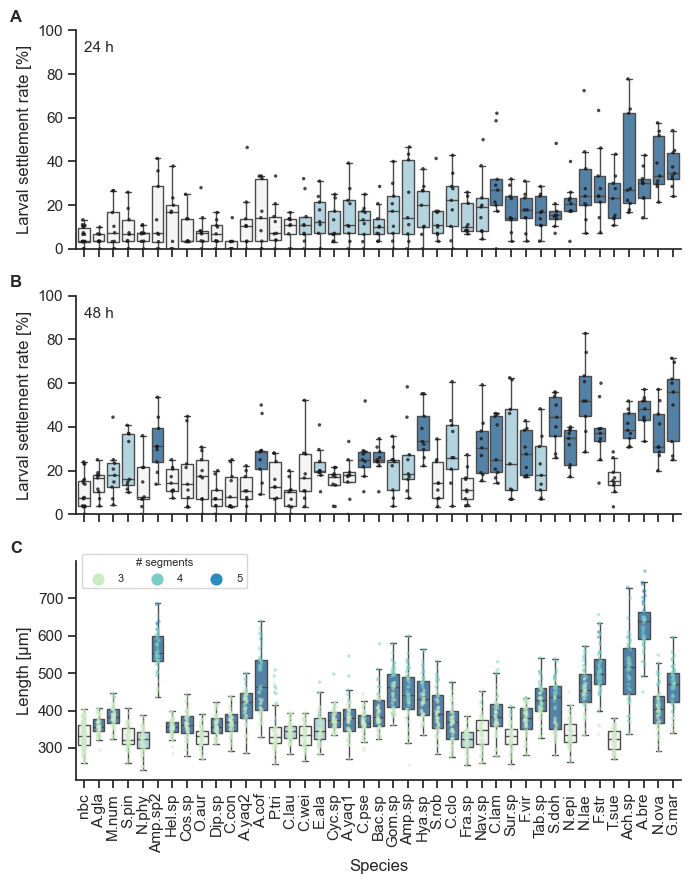

In [26]:
#Now we can make plots for % settlement alive at 24h and 48h,and length at 11 days.

#Order them by p-value+median % settlement at 24h
newranks = dftest.sort_values(['24h p-value', 'Median'],
              ascending = [False, True])

#Colour them according to p-value from Mann-Whitney U-test

fig, axes = plt.subplots(3, 1, figsize=(7, 9))
sns.set_style('ticks')
sns.despine()


#% settlement alive at 24h after induction
plot1 = sns.boxplot(ax=axes[0], data=subset24, x="Abbreviation", y="%_settlement_alive", order=newranks["Abbreviation"], linewidth=1.0, 
                    #color="whitesmoke", 
                    fliersize=0, palette=dictionary)
plot1 = sns.stripplot(ax=axes[0], data=subset24, x='Abbreviation', y="%_settlement_alive", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, order=newranks["Abbreviation"], color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Larval settlement rate [%]")
plot1.set_ylim(0, 100)
#plot1.get_xaxis().set_visible(False)
#plot1.xaxis.set_major_locator(ticker.NullLocator())
plot1.set(xticklabels=[]) 
plot1.set(xlabel=None)
plot1.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})
plot1.text(0.0, 90,'24 h', fontsize=11) #add text

#% settlement alive at 48h after induction
plot2 = sns.boxplot(ax=axes[1], data=subset48, x="Abbreviation", y="%_settlement_alive", order=newranks["Abbreviation"], linewidth=1.0, #color="gainsboro",
                    fliersize=0, palette=dictionary48)
plot2 = sns.stripplot(ax=axes[1], data=subset48, x='Abbreviation', y="%_settlement_alive", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, order=newranks["Abbreviation"], color="k")
#plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set_ylabel("Larval settlement rate [%]")
plot2.set_ylim(0, 100)
plot2.set(xticklabels=[])
plot2.set(xlabel=None)
plt.tight_layout()
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})
plot2.text(0.0, 90,'48 h', fontsize=11) #add text

#Length at 11d (8d after induction)

growthplot = sns.boxplot(ax=axes[2], data=df2, order=newranks["Abbreviation"], linewidth=1.0, x="Abbreviation", y="Length (micron)", palette=dictionary_growth, fliersize=0)
growthplot = sns.stripplot(ax=axes[2], data=df2, order=newranks["Abbreviation"], x="Abbreviation", y="Length (micron)", hue="No. segments", palette='GnBu', alpha=0.5, size=2.5)
growthplot.set_xticklabels(growthplot.get_xticklabels(), rotation=90)
growthplot.set_ylabel("Length [µm]")
growthplot.set_xlabel("Species")
growthplot.set_title('C', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#Position legend top left inside graph
sns.move_legend(
    growthplot, "lower left",
    bbox_to_anchor=(0, 0.85), ncol=3, title='# segments', frameon=True, fontsize=8, title_fontsize=8)


plt.tight_layout()


#Export graph to svg file
plt.savefig("../output/Figure2.svg", bbox_inches='tight')

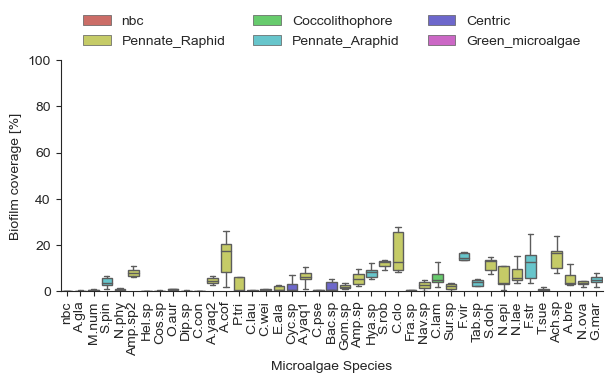

In [15]:
#Plot algal biofilm density according to ranked species, for supplementary figure

plt.figure(figsize=(7,3))
ax=sns.boxplot(data=df, x="Abbreviation", y="diatom_%area", order=newranks["Abbreviation"], hue="Group", linewidth=1, palette="hls", dodge=False, fliersize=0)

#put legend above chart, unbound
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
sns.set_style('ticks')
sns.despine()
sns.set_context('paper', font_scale = 1)
plt.xticks(rotation=90)
plt.xlabel("Microalgae Species")
plt.ylabel("Biofilm coverage [%]")
#Make y-axis range 0 to 100
ax.set_ylim(0, 100)

#Export graph to an svg file for use in figure 
plt.savefig("../output/SuppFig2a.svg", bbox_inches='tight')

In [16]:
#For checking correlation of algal density to % settlement, we should use a data subset that excludes the no biofilm control measurements (nbc)

df_nonbc = df[df["Abbreviation"] != "nbc"]
print(df.count())

#Check correlation between % larval settlement and % algal density with Pearson correlation test.

import numpy as np
import scipy.stats

y = df_nonbc.loc[df["Time after induction (h)"]==24, "%_settlement_alive"]
x = df_nonbc.loc[df["Time after induction (h)"]==24, "diatom_%area"]

#Run a Kendall's tau correlation test, a non-parametric test.           
plotname = scipy.stats.kendalltau(x, y)  # Kendall's tau statistic=0.2856468341471281, pvalue=2.644530017921499e-16
print(plotname)


Date                        756
Abbreviation                756
Species                     756
#_coverslip                 756
#_crawl                     756
#_swim                      756
#_dead                      756
diatom_%area                756
Group                       756
Size (micron)               756
Size class                  756
Cell shape                  756
Cell assemblage             756
Time after induction (h)    756
Age (dpf)                   756
%_settlement_total          756
%_settlement_alive          756
dtype: int64
SignificanceResult(statistic=0.25696476497859805, pvalue=6.364664610447089e-13)


In [17]:
#now I will do the same, but for the 48h data:

y48 = df_nonbc.loc[df["Time after induction (h)"]==48, "%_settlement_alive"]
x48 = df_nonbc.loc[df["Time after induction (h)"]==48, "diatom_%area"]

#Run a Kendall's tau correlation test, a non-parametric test.           
plotname48 = scipy.stats.kendalltau(x48, y48)  # Kendall's tau statistic=0.2856468341471281, pvalue=2.644530017921499e-16
print(plotname48)

SignificanceResult(statistic=0.3054122697897448, pvalue=8.150746171030062e-18)


In [18]:
#Test correlation between settlement and biofilm density, but for only signigicantly inductive species.
#make a dataset of just the three *** and four **** star larvae, according to Mann-Whitney p-values:

threestarplus = df[(df["Abbreviation"] == "G.mar") | (df["Abbreviation"] == "N.lae") | (df["Abbreviation"] == "Ach.sp") | (df["Abbreviation"] == "A.bre") | (df["Abbreviation"] == "N.ova") | (df["Abbreviation"] == "F.stria") | (df["Abbreviation"] == "S.doh") | (df["Abbreviation"] == "C.lam") | (df["Abbreviation"] == "Hya.sp") | (df["Abbreviation"] == "N.epi") | (df["Abbreviation"] == "Nav.sp") | (df["Abbreviation"] == "Sur.sp") | (df["Abbreviation"] == "F.vir") | (df["Abbreviation"] == "C.pse") | (df["Abbreviation"] == "Tab.sp") | (df["Abbreviation"] == "Bac.sp")]
threestarplus.head()

#Check correlation between % larval settlement and % algal density with Pearson correlation test.

import numpy as np
import scipy.stats

y = threestarplus.loc[threestarplus["Time after induction (h)"]==24, "%_settlement_alive"]
x = threestarplus.loc[threestarplus["Time after induction (h)"]==24, "diatom_%area"]

#Run a Kendall's tau correlation test, a non-parametric test.           
plotname3star = scipy.stats.kendalltau(x, y)  # Kendall's tau statistic=0.2856468341471281, pvalue=2.644530017921499e-16
print(plotname3star)

SignificanceResult(statistic=0.0991953993301968, pvalue=0.08966306196900162)


In [19]:
#Also for 48h dataset
#Test correlation between settlement and biofilm density, but for only signigicantly inductive species.
#make a dataset of just the three *** and four **** star larvae, according to Mann-Whitney p-values:

threestarplus48 = df[(df["Abbreviation"] == "G.mar") | (df["Abbreviation"] == "N.lae") | (df["Abbreviation"] == "Ach.sp") | (df["Abbreviation"] == "A.bre") | (df["Abbreviation"] == "N.ova") | (df["Abbreviation"] == "F.stria") | (df["Abbreviation"] == "S.doh") | (df["Abbreviation"] == "C.lam") | (df["Abbreviation"] == "Hya.sp") | (df["Abbreviation"] == "N.epi") | (df["Abbreviation"] == "Nav.sp") | (df["Abbreviation"] == "Sur.sp") | (df["Abbreviation"] == "F.vir") | (df["Abbreviation"] == "C.pse") | (df["Abbreviation"] == "Tab.sp") | (df["Abbreviation"] == "Bac.sp")]
threestarplus48.head()

#Check correlation between % larval settlement and % algal density with Pearson correlation test.

import numpy as np
import scipy.stats

y48 = threestarplus48.loc[threestarplus48["Time after induction (h)"]==48, "%_settlement_alive"]
x48 = threestarplus48.loc[threestarplus48["Time after induction (h)"]==48, "diatom_%area"]

#Run a Kendall's tau correlation test, a non-parametric test.           
plotname3star48 = scipy.stats.kendalltau(x48, y48)  # Kendall's tau statistic=0.2856468341471281, pvalue=2.644530017921499e-16
print(plotname3star48)

SignificanceResult(statistic=0.14227150608622383, pvalue=0.01480335680605792)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      756 non-null    object 
 1   Abbreviation              756 non-null    object 
 2   Species                   756 non-null    object 
 3   #_coverslip               756 non-null    int64  
 4   #_crawl                   756 non-null    int64  
 5   #_swim                    756 non-null    int64  
 6   #_dead                    756 non-null    int64  
 7   diatom_%area              756 non-null    float64
 8   Group                     756 non-null    object 
 9   Size (micron)             756 non-null    object 
 10  Size class                756 non-null    object 
 11  Cell shape                756 non-null    object 
 12  Cell assemblage           756 non-null    object 
 13  Time after induction (h)  756 non-null    int64  
 14  Age (dpf) 

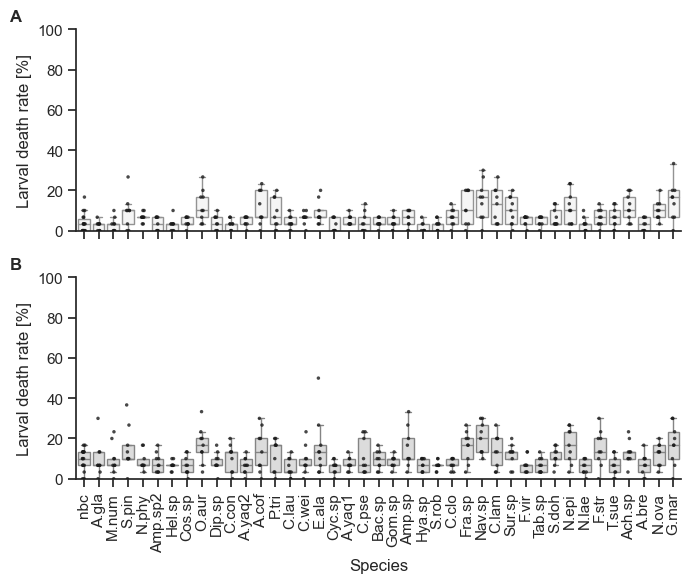

In [20]:
#Add a column to dataframe for % dead larvae and plot this across species
df['%_dead'] = df['#_dead'] / 30 * 100
df.info()

#Set theme & style of Seaborn plot
sns.set_theme(style="ticks", palette="pastel")
sns.set(font="Arial")
sns.set_context("paper", font_scale = 1)

#Make a neutral palette
# color palette as dictionary
mypalette = {24:"whitesmoke", 48:"gainsboro"}

#Define specific properties of boxplot, so that lines and whiskers on boxes are black
PROPS = {
    'boxprops':{'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

#Define an order of species on x-axis, ranking from lowest to highest mean % settlement of living larvae
ranks = df.groupby("Abbreviation")["%_settlement_alive"].mean().fillna(0).sort_values()[::1].index

#Define how outliers should look in boxplot
flierprops = dict(markerfacecolor='0.5', markersize=4,
              linestyle='none')

# Draw a nested boxplot to show %larval settlement of those still alive by algae species and time
sns.set_theme(style="ticks", palette="pastel")

#make a subset of df where time=24 h after induction
subset24 = df.loc[df["Time after induction (h)"]==24]

#make a subset of df where time=48 h after induction
subset48 = df.loc[df["Time after induction (h)"]==48]

#Try to plot the same data, but split the 24 & 48h data into two separate graphs, one on top of the other.
fig, axes = plt.subplots(2, 1, figsize=(7, 6))
sns.despine()

#% settlement alive at 24h after induction
plot1 = sns.boxplot(ax=axes[0], data=subset24, x="Abbreviation", y="%_dead", order=newranks["Abbreviation"], linewidth=1.0, color="whitesmoke", fliersize=0)
plot1 = sns.stripplot(ax=axes[0], data=subset24, x='Abbreviation', y="%_dead", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, order=newranks["Abbreviation"], color="k")
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set_ylabel("Larval death rate [%]")
plot1.set_ylim(0, 100)
#plot1.get_xaxis().set_visible(False)
#plot1.xaxis.set_major_locator(ticker.NullLocator())
plot1.set(xticklabels=[]) 
plot1.set(xlabel=None)
plot1.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})

#% settlement alive at 48h after induction
plot2 = sns.boxplot(ax=axes[1], data=subset48, x="Abbreviation", y="%_dead", order=newranks["Abbreviation"], linewidth=1.0, color="gainsboro", fliersize=0)
plot2 = sns.stripplot(ax=axes[1], data=subset48, x='Abbreviation', y="%_dead", jitter=True, dodge=True, marker='o', alpha=0.8, size=2.5, order=newranks["Abbreviation"], color="k")
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set_ylabel("Larval death rate [%]")
plot2.set_ylim(0, 100)
plt.xlabel("Species")
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(-0.1,0)})
plt.tight_layout()

#Export graph to an svg file for use in figure 
plt.savefig("../output/figS2a-supp.svg", bbox_inches='tight')

In [21]:
#do Kruskal-Wallis Test to check if significant difference between different groups at timepoint 24hpf.. Shapiro-Wilks test suggests data is not normally distributed.
#We are interest in 'Group', 'Size class', 'Cell shape' and 'Cell assemblage'
import scipy.stats as stats

kruskalgroup=stats.kruskal(subset24["%_settlement_alive"][subset24["Group"] == "nbc"],
               subset24["%_settlement_alive"][subset24["Group"] == "Pennate_Raphid"],
                subset24["%_settlement_alive"][subset24["Group"] == "Coccolithophore"],
                subset24["%_settlement_alive"][subset24["Group"] == "Pennate_Araphid"],
                subset24["%_settlement_alive"][subset24["Group"] == "Centric"],
                subset24["%_settlement_alive"][subset24["Group"] == "Green_microalgae"])
print(kruskalgroup)
#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp

datagroup = [subset24["%_settlement_alive"][subset24["Group"] == "nbc"], subset24["%_settlement_alive"][subset24["Group"] == "Pennate_Raphid"], subset24["%_settlement_alive"][subset24["Group"] == "Coccolithophore"], subset24["%_settlement_alive"][subset24["Group"] == "Pennate_Araphid"], subset24["%_settlement_alive"][subset24["Group"] == "Centric"], subset24["%_settlement_alive"][subset24["Group"] == "Green_microalgae"]]
p_values = sp.posthoc_dunn(datagroup, p_adjust = 'bonferroni')
print(p_values)

p_values < 0.01
#KruskalResult(statistic=52.72037415187003, pvalue=3.838606646867595e-10)
#results shows centric diatoms no different from control, but there is no preference towards any other single group.



KruskalResult(statistic=52.72037415187003, pvalue=3.838606646867595e-10)
          1         2         3         4         5         6
1  1.000000  0.000076  0.000495  0.000393  0.943349  0.001173
2  0.000076  1.000000  1.000000  1.000000  0.000007  1.000000
3  0.000495  1.000000  1.000000  1.000000  0.007677  1.000000
4  0.000393  1.000000  1.000000  1.000000  0.001348  1.000000
5  0.943349  0.000007  0.007677  0.001348  1.000000  0.018010
6  0.001173  1.000000  1.000000  1.000000  0.018010  1.000000


,1,2,3,4,5,6
1,False,True,True,True,False,True
2,True,False,False,False,True,False
3,True,False,False,False,True,False
4,True,False,False,False,True,False
5,False,True,True,True,False,False
6,True,False,False,False,False,False


In [22]:
#Now we check 'Size class'
kruskalsizeclass=stats.kruskal(subset24["%_settlement_alive"][subset24["Size class"] == "nbc"],
               subset24["%_settlement_alive"][subset24["Size class"] == "0 - 10"],
                subset24["%_settlement_alive"][subset24["Size class"] == "10 - 20"],
                subset24["%_settlement_alive"][subset24["Size class"] == "20 - 30"],
                subset24["%_settlement_alive"][subset24["Size class"] == "30 - 40"],
                subset24["%_settlement_alive"][subset24["Size class"] == "40 - 50"],
                subset24["%_settlement_alive"][subset24["Size class"] == "50 - 75"],
                subset24["%_settlement_alive"][subset24["Size class"] == "75 - 100"])
print(kruskalsizeclass)

datasizeclass = [subset24["%_settlement_alive"][subset24["Size class"] == "nbc"], subset24["%_settlement_alive"][subset24["Size class"] == "0 - 10"], subset24["%_settlement_alive"][subset24["Size class"] == "10 - 20"], subset24["%_settlement_alive"][subset24["Size class"] == "20 - 30"], subset24["%_settlement_alive"][subset24["Size class"] == "30 - 40"], subset24["%_settlement_alive"][subset24["Size class"] == "40 - 50"], subset24["%_settlement_alive"][subset24["Size class"] == "50 - 75"], subset24["%_settlement_alive"][subset24["Size class"] == "75 - 100"]]
p_valuessizeclass = sp.posthoc_dunn(datasizeclass, p_adjust = 'bonferroni')
print(p_valuessizeclass)

p_valuessizeclass < 0.007
#KruskalResult(statistic=51.87448854174704, pvalue=6.180718899398846e-09)
#results shows groups 2 (0-10 micron),3 (10-20 micron),& 6(40-50 micron) are significantly different than control. There is no significant difference amongst those three group sizes.


KruskalResult(statistic=51.87448854174704, pvalue=6.180718899398846e-09)
          1         2         3         4         5         6         7  \
1  1.000000  0.000016  0.000141  0.056552  1.000000  0.004742  1.000000   
2  0.000016  1.000000  1.000000  0.221623  0.001143  1.000000  0.000497   
3  0.000141  1.000000  1.000000  1.000000  0.009949  1.000000  0.004535   
4  0.056552  0.221623  1.000000  1.000000  1.000000  1.000000  1.000000   
5  1.000000  0.001143  0.009949  1.000000  1.000000  0.160543  1.000000   
6  0.004742  1.000000  1.000000  1.000000  0.160543  1.000000  0.098306   
7  1.000000  0.000497  0.004535  1.000000  1.000000  0.098306  1.000000   
8  0.378464  0.336537  1.000000  1.000000  1.000000  1.000000  1.000000   

          8  
1  0.378464  
2  0.336537  
3  1.000000  
4  1.000000  
5  1.000000  
6  1.000000  
7  1.000000  
8  1.000000  


,1,2,3,4,5,6,7,8
1,False,True,True,False,False,True,False,False
2,True,False,False,False,True,False,True,False
3,True,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False
7,False,True,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False


In [23]:
#now, we check 'Cell shape'
kruskalcellshape=stats.kruskal(subset24["%_settlement_alive"][subset24["Cell shape"] == "nbc"],
               subset24["%_settlement_alive"][subset24["Cell shape"] == "pennate"],
                subset24["%_settlement_alive"][subset24["Cell shape"] == "round"])
print(kruskalcellshape)

datacellshape = [subset24["%_settlement_alive"][subset24["Cell shape"] == "nbc"], subset24["%_settlement_alive"][subset24["Cell shape"] == "pennate"], subset24["%_settlement_alive"][subset24["Cell shape"] == "round"]]
p_valuescellshape = sp.posthoc_dunn(datacellshape, p_adjust = 'bonferroni')
print(p_valuescellshape)

p_valuescellshape < 0.025
#KruskalResult(statistic=32.03373719598774, pvalue=1.1065278536725637e-07)
#results show that both cell shapes significantly different from control, and from each other, with 'pennate' giving high settlement, 'round' lower settlement, 'none' lowest settlment



KruskalResult(statistic=32.03373719598774, pvalue=1.1065278536725637e-07)
          1         2         3
1  1.000000  0.000012  0.023822
2  0.000012  1.000000  0.000285
3  0.023822  0.000285  1.000000


,1,2,3
1,False,True,True
2,True,False,True
3,True,True,False


In [24]:
#now, we check 'Cell assemblage'
kruskalcellass=stats.kruskal(subset24["%_settlement_alive"][subset24["Cell assemblage"] == "nbc"],
               subset24["%_settlement_alive"][subset24["Cell assemblage"] == "chains"],
                subset24["%_settlement_alive"][subset24["Cell assemblage"] == "solitary"])
print(kruskalcellass)

datacellass = [subset24["%_settlement_alive"][subset24["Cell assemblage"] == "nbc"], subset24["%_settlement_alive"][subset24["Cell assemblage"] == "chains"], subset24["%_settlement_alive"][subset24["Cell assemblage"] == "solitary"]]
p_valuescellass = sp.posthoc_dunn(datacellshape, p_adjust = 'bonferroni')
print(p_valuescellass)

p_valuescellass < 0.025
#KruskalResult(statistic=18.99181096268572, pvalue=7.515894040751246e-05)
#results show that both solitary and chain forms cause higher settlement than control, but chains cause significantly higher levels of settlement compared to solitary.

KruskalResult(statistic=18.99181096268572, pvalue=7.515894040751246e-05)
          1         2         3
1  1.000000  0.000012  0.023822
2  0.000012  1.000000  0.000285
3  0.023822  0.000285  1.000000


,1,2,3
1,False,True,True
2,True,False,True
3,True,True,False


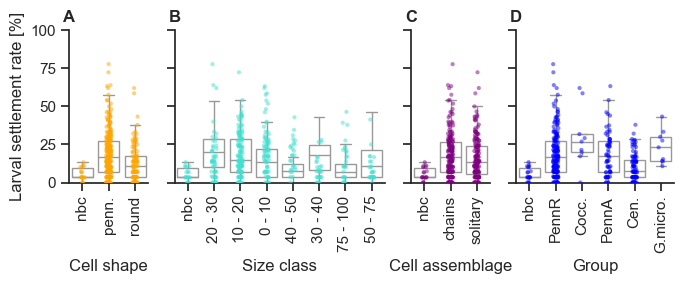

In [25]:
#Create subplots of data from 24h settlement, grouped by the groups investigated above (Group, Size class, Cell shape, Cell assemblage)

sns.set_style("ticks")
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(7, 3), width_ratios=[1, 8.0/3.0, 1, 2])

#Group
plot1 = sns.boxplot(ax=axes[3], data=subset24, x="Group", y="%_settlement_alive", color="white", fliersize=0, linewidth=1)
plot1 = sns.stripplot(ax=axes[3], data=subset24, x="Group", y="%_settlement_alive", color="blue", alpha=0.5, size=3)
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90)
plot1.set(ylabel=None)
plot1.set_ylim(0, 100)
plot1.set_xticklabels(['nbc', 'PennR', 'Cocc.','PennA','Cen.','G.micro.'])
plot1.set_title('D', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(0,0)})

#Size class
plot2 = sns.boxplot(ax=axes[1], data=subset24, x=subset24["Size class"], 
                    y=subset24["%_settlement_alive"], color="white", fliersize=0,
                    order=["nbc", "0 - 10", "10 - 20", "20 - 30", "30 - 40", "40 - 50", "50 - 75", "75 - 100"],
                   linewidth=1)
plot2 = sns.stripplot(ax=axes[1], data=subset24, x="Size class", y="%_settlement_alive", color="turquoise", alpha=0.5, size=3)
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90)
plot2.set(ylabel=None)
plot2.set_title('B', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(0,0)})

#Cell shape
plot3 = sns.boxplot(ax=axes[0], data=subset24, x=subset24["Cell shape"], y=subset24["%_settlement_alive"], color="white", 
                    fliersize=0, linewidth=1)
plot3 = sns.stripplot(ax=axes[0], data=subset24, x="Cell shape", y="%_settlement_alive", color="orange", alpha=0.5, size=3)
plot3.set_xticklabels(plot3.get_xticklabels(), rotation=90)
plot3.set_ylabel("Larval settlement rate [%]")
plot3.set_xticklabels(['nbc', 'penn.', 'round'])
plot3.set_title('A', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(0,0)})

#Cell assemblage
plot4 = sns.boxplot(ax=axes[2], data=subset24, x=subset24["Cell assemblage"], y=subset24["%_settlement_alive"], 
                    color="white", fliersize=0, linewidth=1)
plot4 = sns.stripplot(ax=axes[2], data=subset24, x="Cell assemblage", y="%_settlement_alive", color="purple", alpha=0.5, size=3)
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=90)
plot4.set(ylabel=None)
plot4.set_title('C', fontdict={'size': 12, 'weight': 'bold', 'name': 'Arial', 'position':(0,0)})

fig.tight_layout()
fig.align_labels()
sns.despine()

#Save to file
plt.savefig("../output/Species-Specificity/fig2B.svg", bbox_inches='tight')